# Project Description

### Analysis of COVID-19 Cases and Demographics
* Objective

The goal of the program is to analyze statewide COVID-19 death cases by demographics (age and ethnicity), identify patterns in the data, and to create effective data visualization using data from CHHS (California Health and Human Services). 

* Background

As of now, roughly 638 million cases have been reported and around 6.62 million people have died from the coronavirus SARS-CoV-2, more widely known as COVID-19. Respectively, that is almost 8% and 0.08% of the population. Although vaccines and booster shots have now been implemented worldwide and accessible to most, the disease had and continues to have a significant impact on the world. As such, we are interested in analyzing potential trends or patterns within the death cases reported based on age or ethnicity, or both. We believe it is important to analyze the impacts of COVID-19, as it can help effectively prevent and respond to inevitable future pandemics.

* Approach

The data from CHHS that we are using for this project consists of various categories, including age, ethnicity, case numbers and percentages, death numbers and percentages, percent of California population, as well as the report date of the case. With these values, we would like to first analyze trends by category individually then try to identify any correlations between two or more categories. For instance, we could start with the demographic category of age (separated into 0-17, 18-49, 50-64, 65+) and determine whether death cases and age have a positive relationship (where, as the age increases, the number of death cases increases as well). Then, we could also compare age and death numbers to the report date, which should have increased due to limited hospital space and lack of vaccines at the beginning of the pandemic. We are also interested in seeing the percent in different categories that exceed a certain threshold for case and death numbers. These trends and patterns will be supported by visual representations, including data tables and graphs. 

* Collaboration Notes

Team members: Zoya Chih, Anny Li, Aina Huang

We will be using GitHub and Jupyterhub to collaborate on and share the same codebase. With our proposed plan, the tasks can be divided into basic data analysis (i.e. average, minimum/maximum, standard deviation), data comparison and trend or pattern identification (difference/similarity/correlation), and data visualization. With data analysis that builds upon the previous step, it would be more ideal if all members contribute to each task rather than dividing the work by individual steps mentioned previously, as it would provide all members a better understanding of the data prior to comparing data and creating data visualizations. 

* Works Cited

(CHHS data)

# Project Code

### Import modules and raw data

In [1]:
# import packages needed for data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
import textwrap
%matplotlib inline

In [2]:
# create dataframe from csv file of covid-19 cases
covid_df = pd.read_csv('covid19casesdemographics.csv',sep=',')

# reassign index
# row_index = 'demographic_category'
# covid_df = covid_df.set_index(row_index)
covid_df.head()

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,Age Group,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,Age Group,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,Age Group,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,Age Group,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,Age Group,0-17,1085,2.5,0,0.0,22.5,2020-04-26


### Error Handling

In [3]:
# test if the covid data includes all demographic categories
try:
    assert covid_df.shape[0] == 13248, 'Dataset incomplete.'
except Exception as msg:
    print(msg)

## Data Visualization
Now we will visualize any potential trends found between a demographic category or value as well as other categories, including total & percent cases, total & percent deaths, and percent California population.

In [4]:
# import age # not sure if useful atm

# reassign index to demographic value
row_index = 'demographic_value'
covid_df = covid_df.set_index(row_index)
covid_df.head()

,demographic_category,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
demographic_value,,,,,,,
0-17,Age Group,855,2.3,0,0.0,22.5,2020-04-22
0-17,Age Group,936,2.4,0,0.0,22.5,2020-04-23
0-17,Age Group,1011,2.5,0,0.0,22.5,2020-04-24
0-17,Age Group,1039,2.5,0,0.0,22.5,2020-04-25
0-17,Age Group,1085,2.5,0,0.0,22.5,2020-04-26


### Determining total cases by age group, gender, and ethnicity

In [5]:
# note: all age categories have 693 reports

# age range 0-17 
covid_df.loc['0-17']
age017_sum = np.sum(covid_df.iloc[0:693,1])
print('Total covid-19 cases in 0-17 years: '+ age017_sum.astype(str))

# age range 18-49
covid_df.loc['18-49']
age1849_sum = np.sum(covid_df.iloc[693:1386,1]).astype(float)
print('Total covid-19 cases in 18-49 years: '+ age1849_sum.astype(str))

# age range 50-64
covid_df.loc['50-64']
age5064_sum = np.sum(covid_df.iloc[1386:2079,1]).astype(float)
print('Total covid-19 cases in 50-64 years: '+ age5064_sum.astype(str))

# age range 65+
covid_df.loc['65+']
age65plus_sum = np.sum(covid_df.iloc[2079:2772,1]).astype(float)
print('Total covid-19 cases in 65+ years: '+ age017_sum.astype(str))

Total covid-19 cases in 0-17 years: 373683364
Total covid-19 cases in 18-49 years: 1373982737.0
Total covid-19 cases in 50-64 years: 438401811.0
Total covid-19 cases in 65+ years: 373683364


In [6]:
# note: all gender categories have 693 reports

# gender: female
covid_df.loc['Female']
female_sum = np.sum(covid_df.iloc[4158:4851,1]).astype(float)
print('Total covid-19 cases in females: ' + female_sum.astype(str))

# gender: male
covid_df.loc['Male']
male_sum = np.sum(covid_df.iloc[4851:5544,1]).astype(float)
print('Total covid-19 cases in males: ' + male_sum.astype(str))

Total covid-19 cases in females: 1239226198.0
Total covid-19 cases in males: 1153169140.0


In [7]:
# note: all ethnicity categories have 702 reports

# ethnicity: American Indian or Alaska Native
covid_df.loc['American Indian or Alaska Native']
AIAN_sum = np.sum(covid_df.iloc[6930:7632,1]).astype(float)
print('Total covid-19 cases in American Indian or Alaska Native: ' + AIAN_sum.astype(str))

# ethnicity: Asian
covid_df.loc['Asian']
asian_sum = np.sum(covid_df.iloc[7632:8334,1]).astype(float)
print('Total covid-19 cases in Asian: ' + asian_sum.astype(str))

# ethnicity: Black
covid_df.loc['Black']
black_sum = np.sum(covid_df.iloc[8334:9036,1]).astype(float)
print('Total covid-19 cases in Black: ' + black_sum.astype(str))

# ethnicity: Latino
covid_df.loc['Latino']
latino_sum = np.sum(covid_df.iloc[9036:9738,1]).astype(float)
print('Total covid-19 cases in Latino: ' + latino_sum.astype(str))

# ethnicity: Multi-Race
covid_df.loc['Multi-Race']
multi_sum = np.sum(covid_df.iloc[9738:10440,1]).astype(float)
print('Total covid-19 cases in Multi-Race: ' + multi_sum.astype(str))

# ethnicity: Native Hawaiian and other Pacific Islander
covid_df.loc['Native Hawaiian and other Pacific Islander']
NHPI_sum = np.sum(covid_df.iloc[10440:11142,1]).astype(float)
print('Total covid-19 cases in Native Hawaiian and other Pacific Islander: ' + NHPI_sum.astype(str))

# ethnicity: Other
covid_df.loc['Other']
other_sum = np.sum(covid_df.iloc[11142:11844,1]).astype(float)
print('Total covid-19 cases in Other: ' + other_sum.astype(str))

# ethnicity: White
covid_df.loc['White']
white_sum = np.sum(covid_df.iloc[12546:,1]).astype(float)
print('Total covid-19 cases in White: ' + white_sum.astype(str))

Total covid-19 cases in American Indian or Alaska Native: 7616115.0
Total covid-19 cases in Asian: 149833493.0
Total covid-19 cases in Black: 93799260.0
Total covid-19 cases in Latino: 997465365.0
Total covid-19 cases in Multi-Race: 26701811.0
Total covid-19 cases in Native Hawaiian and other Pacific Islander: 12416508.0
Total covid-19 cases in Other: 208131744.0
Total covid-19 cases in White: 435342105.0


### Total COVID-19 cases vs. Age

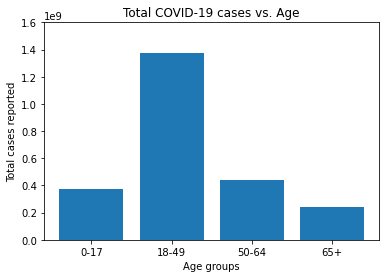

In [8]:
age_groups = ['0-17','18-49','50-64','65+']
total_cases = [age017_sum,age1849_sum,age5064_sum,age65plus_sum]

plt.bar(age_groups,total_cases)
plt.title('Total COVID-19 cases vs. Age')
plt.xlabel('Age groups')
plt.ylabel('Total cases reported')
plt.ylim([0*1e9,1.6*1e9])
plt.show()

### Total COVID-19 cases vs. Gender

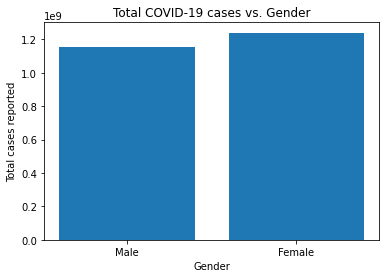

In [9]:
gender = ['Male','Female']
total_cases = [male_sum,female_sum]

plt.bar(gender,total_cases)
plt.title('Total COVID-19 cases vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Total cases reported')
plt.show()

### Total COVID-19 cases vs. Ethnicity

In [ ]:
ethnicity = ['American Indian\nor\nAlaska Native','Asian','Black','Latino','Multi-Race','Native Hawaiian\nand other\nPacific Islander','White','Other']
total_cases = [AIAN_sum,asian_sum,black_sum,latino_sum,multi_sum,NHPI_sum,white_sum,other_sum]

ax = plt.bar(ethnicity,total_cases)
plt.title('Total COVID-19 cases vs. Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Total cases reported')
plt.xticks(rotation=90)
plt.tick_params(axis='x',labelsize=9)
plt.ylim([0*1e9,1.2*1e9])

plt.show()

### Total COVID-19 cases vs. Time by age groups

In [ ]:
covid_df = pd.read_csv('covid19casesdemographics.csv',sep=',',parse_dates=['report_date'])

# creating new column for report date with format YYYY-MM
covid_df['year_month'] = covid_df['report_date'].dt.date
covid_df['year_month'] = covid_df['report_date'].dt.normalize()

# changing month from number MM to abbreviated month
for i in covid_df['year_month']:
    covid_df['year'] = covid_df['report_date'].dt.year
    covid_df['month_name_short'] = covid_df['report_date'].dt.month_name().str[:3]
    covid_df['year_month'] = covid_df['year'].astype(str) + ' ' + covid_df['month_name_short'].astype(str)

print(covid_df.info())
covid_df.head()

In [ ]:
row_index = 'year_month'
covid_df = covid_df.set_index(row_index)
fig,ax = plt.subplots(figsize=(8,5))

age017_1 = np.sum(covid_df.iloc['2020 Apr':'2020 Oct',2]).astype(float)
# age1849 = 
# age5064 = 
# age65plus = 

# ax.plot((covid_df[]))

ax.set_xlabel('Time (year month)')
ax.set_ylabel('Total cases')
ax.set_title('Total COVID-19 cases vs. Time by age groups')
ax.legend(['0-17 years','18-49 years','50-64 years','65+ years'])

plt.show()
covid_df.head()

### Missing and Unknown Data

In [ ]:
# CHHS data has "Missing" (for gender) and "Unknown" (for race/ethnicity) for some of the demographic values. 

covid_df.loc['Missing'] #total reports=278
missing_1_sum = np.sum(covid_df.iloc[2772:3050,1]).astype(float)
covid_df.loc['missing'] #total reports=415
missing_2_sum = np.sum(covid_df.iloc[3743:4158,1]).astype(float)
total_missing_data = missing_1_sum + missing_2_sum
print('Total missing (for gender) data: '+total_missing_data.astype(str))

covid_df.loc['Unknown'] #total reports=693
unknown_sum = np.sum(covid_df.iloc[6237:6930,1]).astype(float)
print('Total unknown (for race/ethnicity) data: '+unknown_sum.astype(str))

## Reflection

### Zoya Chih
...
### Anny Li
...
### Aina Huang
...